In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import cv2
from scipy.io.wavfile import write
from datetime import datetime
import subprocess
import numexpr as ne

# Simulation

In [2]:
def get_interpolated(array, index):
    if not hasattr(index, "__len__") or len(index) < 1: return array # if scalar
    return (1 - (index[0] % 1)) * get_interpolated(array[int(np.floor(index[0]))], index[1:]) + (index[0] % 1) * get_interpolated(array[int(np.ceil(index[0]))], index[1:])

In [3]:
def interpolate_1d(array, indices):
    t = indices.reshape(-1, 1, 1) % 1
    left = array[np.floor(indices).astype(np.int64)]
    right = array[np.ceil(indices).astype(np.int64)]
    print("first step done")
    return (1 - t) * left + t * right

In [4]:
interpolate_1d(np.array([[1, 2],[3, 4]]), np.array([0.5]))

first step done


array([[[2., 3.]]])

In [5]:
def gaussian(x, y, n, offset, width):
    x = (x - n/2.0) / (n/2.0) - offset[0]
    y = (y - n/2.0) / (n/2.0) - offset[1]
    return np.exp(-(x*x + y*y) / (width*width)) + 0j

In [6]:
def parabolar(x, y, n, offset, factor):
    x = (x - n/2.0) / (n/2.0) - offset[0]
    y = (y - n/2.0) / (n/2.0) - offset[1]
    return factor * (x*x + y*y)


In [7]:
def calculate_next_psi(psi, dt, potential):
    n = psi.shape[0]
    next_psi = np.zeros((n, n), dtype=np.complex_)

    # potential-part
    next_psi = psi * np.exp(1j * dt * potential)

    next_psi = np.fft.fft2(next_psi)
    
    indices = 2 * np.pi * np.min([np.arange(n), n-np.arange(n)], axis=0)
    k = indices.reshape(-1, 1)
    l = indices.reshape(1, -1)
    theta = (k*k + l*l) * dt
    next_psi *= np.exp(1j * theta)

    next_psi = np.fft.ifft2(next_psi)
    return next_psi

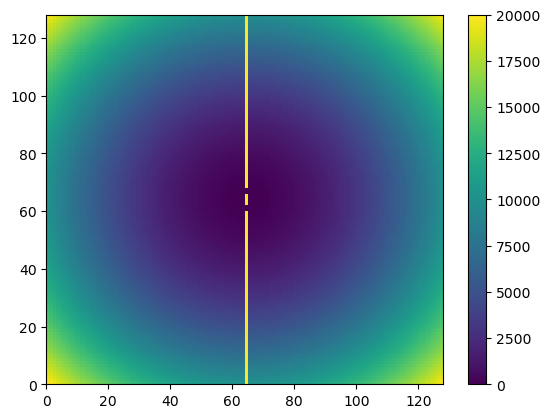

Finished simulation


In [8]:
n = 128
fps = 400
skip_frames = 20
duration = 5
simulation_speed = 0.005

slits_distance = 4
slits_width = 2
wall_height = 1e60

frames = [] # for storing the generated images

psi = np.array([[gaussian(x, y, n, offset=[-0.6, 0.0], width=0.15) for x in range(n)] for y in range(n)])
potential = np.array([[parabolar(x, y, n, offset=[0,0], factor=10000) for x in range(n)] for y in range(n)])
potential[:64-slits_distance//2-slits_width, 64] = wall_height
potential[64+slits_distance//2+slits_width:, 64] = wall_height
potential[64-slits_distance//2:64+slits_distance//2, 64] = wall_height
frames.append(psi)

#plt.pcolormesh(pow(np.abs(frames[0]), 2.0/3.0), cmap='inferno', vmin=0, vmax=1)
plt.pcolormesh(potential, vmin=0, vmax=20000)
plt.colorbar()
plt.show()


for i in range(fps*duration):
    psi = calculate_next_psi(psi, simulation_speed / fps, potential)
    frames.append(psi)

print("Finished simulation")

# Video

In [9]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_filename = f'output/simulation_{datetime.now().strftime("%Y_%m_%d-%H_%M_%S")}.mp4'
video = cv2.VideoWriter(video_filename, fourcc, fps/skip_frames, (800, 600))
for i, frame in enumerate(frames[::skip_frames]):
    plt.figure(figsize=(8, 6))
    plot = plt.pcolormesh(pow(np.abs(frame), 2.0/3.0), cmap='inferno', vmin=0, vmax=1, animated=True)
    plt.colorbar()
    plt.title('psi')

    # Save to temporary file
    plt.savefig('temp_frame.png')
    plt.close()

    # Read the image and add to the video
    img = cv2.imread('temp_frame.png')
    video.write(img)

print(f"Video saved as {video_filename}")
video.release()

Video saved as simulation_2024_04_10-13_12_47.mp4


# Sonification

In [84]:
a = np.array([1+1j, 1+1j])
b = a[:, None].view(float)
np.dot(b[0], b[1])

2.0

In [32]:
average_parallel_listening = lambda array: np.average(array[:, :, 0])
average_orthogonal_listening = lambda array: np.average(array[:, :, 1])
average_norm_listening = lambda array: np.average(np.linalg.norm(array, axis=2))

point_parallel_listening = lambda array: array[20, 60, 0]
point_orthogonal_listening = lambda array: array[20, 60, 1]

In [85]:
sample_rate = 44100
sonification_duration = 5
sonification_duration = np.min([duration, sonification_duration])

listening = average_orthogonal_listening

dampening_per_second = 1 - 1e-12
spring_amount = sample_rate * 15
min_mass = 0.00125
max_mass = 3.2


dampening_per_sample = 1 - pow(1 - dampening_per_second, 1 / sample_rate)

In [86]:
num_simulated_steps = sonification_duration * sample_rate
original_positions = np.indices((n, n), dtype=np.float64).transpose((1, 2, 0))

0.0s


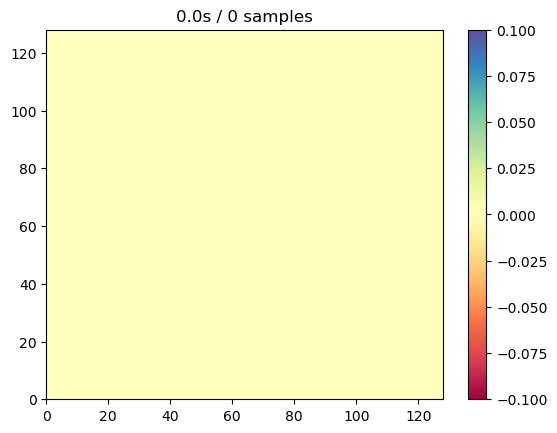

0.01s
0.02s
0.03s
0.04s
0.05s
0.06s
0.07s
0.08s
0.09s
0.1s
0.11s
0.12s
0.13s
0.14s
0.15s
0.16s
0.17s
0.18s
0.19s
0.2s
0.21s
0.22s
0.23s
0.24s
0.25s
0.26s
0.27s
0.28s
0.29s
0.3s
0.31s
0.32s
0.33s
0.34s
0.35s
0.36s
0.37s
0.38s
0.39s
0.4s
0.41s
0.42s
0.43s
0.44s
0.45s
0.46s
0.47s
0.48s
0.49s
0.5s
0.51s
0.52s
0.53s
0.54s
0.55s
0.56s
0.57s
0.58s
0.59s
0.6s
0.61s
0.62s
0.63s
0.64s
0.65s
0.66s
0.67s
0.68s
0.69s
0.7s
0.71s
0.72s
0.73s
0.74s
0.75s
0.76s
0.77s
0.78s
0.79s
0.8s
0.81s
0.82s
0.83s
0.84s
0.85s
0.86s
0.87s
0.88s
0.89s
0.9s
0.91s
0.92s
0.93s
0.94s
0.95s
0.96s
0.97s
0.98s
0.99s
1.0s


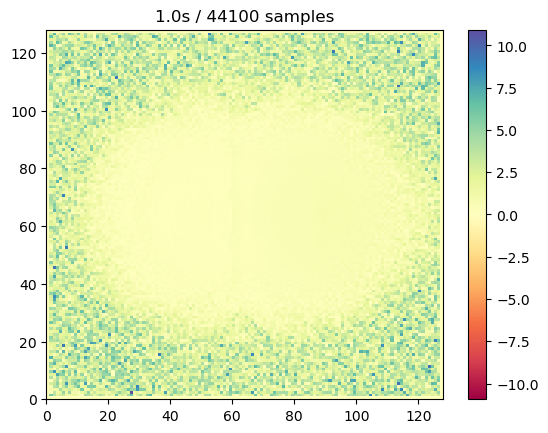

1.01s
1.02s
1.03s
1.04s
1.05s
1.06s
1.07s
1.08s
1.09s
1.1s
1.11s
1.12s
1.13s
1.14s
1.15s
1.16s
1.17s
1.18s
1.19s
1.2s
1.21s
1.22s
1.23s
1.24s
1.25s
1.26s
1.27s
1.28s
1.29s
1.3s
1.31s
1.32s
1.33s
1.34s
1.35s
1.36s
1.37s
1.38s
1.39s
1.4s
1.41s
1.42s
1.43s
1.44s
1.45s
1.46s
1.47s
1.48s
1.49s
1.5s
1.51s
1.52s
1.53s
1.54s
1.55s
1.56s
1.57s
1.58s
1.59s
1.6s
1.61s
1.62s
1.63s
1.64s
1.65s
1.66s
1.67s
1.68s
1.69s
1.7s
1.71s
1.72s
1.73s
1.74s
1.75s
1.76s
1.77s
1.78s
1.79s
1.8s
1.81s
1.82s
1.83s
1.84s
1.85s
1.86s
1.87s
1.88s
1.89s
1.9s
1.91s
1.92s
1.93s
1.94s
1.95s
1.96s
1.97s
1.98s
1.99s
2.0s


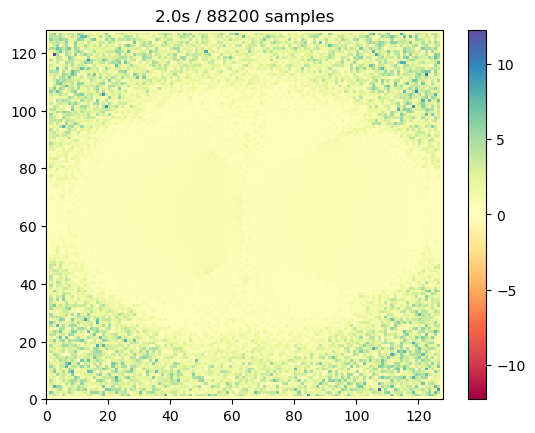

2.01s
2.02s
2.03s
2.04s
2.05s
2.06s
2.07s
2.08s
2.09s
2.1s
2.11s
2.12s
2.13s
2.14s
2.15s
2.16s
2.17s
2.18s
2.19s
2.2s
2.21s
2.22s
2.23s
2.24s
2.25s
2.26s
2.27s
2.28s
2.29s
2.3s
2.31s
2.32s
2.33s
2.34s
2.35s
2.36s
2.37s
2.38s
2.39s
2.4s
2.41s
2.42s
2.43s
2.44s
2.45s
2.46s
2.47s
2.48s
2.49s
2.5s
2.51s
2.52s
2.53s
2.54s
2.55s
2.56s
2.57s
2.58s
2.59s
2.6s
2.61s
2.62s
2.63s
2.64s
2.65s
2.66s
2.67s
2.68s
2.69s
2.7s
2.71s
2.72s
2.73s
2.74s
2.75s
2.76s
2.77s
2.78s
2.79s
2.8s
2.81s
2.82s
2.83s
2.84s
2.85s
2.86s
2.87s
2.88s
2.89s
2.9s
2.91s
2.92s
2.93s
2.94s
2.95s
2.96s
2.97s
2.98s
2.99s
3.0s


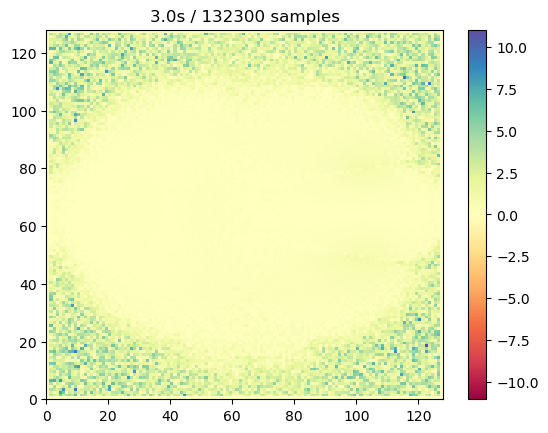

3.01s
3.02s
3.03s
3.04s
3.05s
3.06s
3.07s
3.08s
3.09s
3.1s
3.11s
3.12s
3.13s
3.14s
3.15s
3.16s
3.17s
3.18s
3.19s
3.2s
3.21s
3.22s
3.23s
3.24s
3.25s
3.26s
3.27s
3.28s
3.29s
3.3s
3.31s
3.32s
3.33s
3.34s
3.35s
3.36s
3.37s
3.38s
3.39s
3.4s
3.41s
3.42s
3.43s
3.44s
3.45s
3.46s
3.47s
3.48s
3.49s
3.5s
3.51s
3.52s
3.53s
3.54s
3.55s
3.56s
3.57s
3.58s
3.59s
3.6s
3.61s
3.62s
3.63s
3.64s
3.65s
3.66s
3.67s
3.68s
3.69s
3.7s
3.71s
3.72s
3.73s
3.74s
3.75s
3.76s
3.77s
3.78s
3.79s
3.8s
3.81s
3.82s
3.83s
3.84s
3.85s
3.86s
3.87s
3.88s
3.89s
3.9s
3.91s
3.92s
3.93s
3.94s
3.95s
3.96s
3.97s
3.98s
3.99s
4.0s


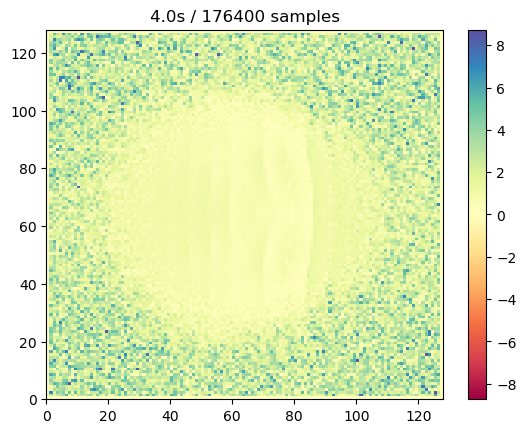

4.01s
4.02s
4.03s
4.04s
4.05s
4.06s
4.07s
4.08s
4.09s
4.1s
4.11s
4.12s
4.13s
4.14s
4.15s
4.16s
4.17s
4.18s
4.19s
4.2s
4.21s
4.22s
4.23s
4.24s
4.25s
4.26s
4.27s
4.28s
4.29s
4.3s
4.31s
4.32s
4.33s
4.34s
4.35s
4.36s
4.37s
4.38s
4.39s
4.4s
4.41s
4.42s
4.43s
4.44s
4.45s
4.46s
4.47s
4.48s
4.49s
4.5s
4.51s
4.52s
4.53s
4.54s
4.55s
4.56s
4.57s
4.58s
4.59s
4.6s
4.61s
4.62s
4.63s
4.64s
4.65s
4.66s
4.67s
4.68s
4.69s
4.7s
4.71s
4.72s
4.73s
4.74s
4.75s
4.76s
4.77s
4.78s
4.79s
4.8s
4.81s
4.82s
4.83s
4.84s
4.85s
4.86s
4.87s
4.88s
4.89s
4.9s
4.91s
4.92s
4.93s
4.94s
4.95s
4.96s
4.97s
4.98s
4.99s


In [87]:
positions = np.copy(original_positions)
speeds = np.zeros((n-2, n-2, 2), dtype=np.float64)
forces = np.zeros((n-2, n-2, 2), dtype=np.float64)

audio = np.empty(num_simulated_steps)

data = frames[0]

for sample in range(num_simulated_steps):
    
    simulation_index = int(sample / sample_rate * fps)
    last_data = data
    data = frames[simulation_index] # no interpolation   
    
    masses = (min_mass + (max_mass - min_mass) * np.abs(data))[1:-1, 1:-1, np.newaxis]
    angles = np.angle(data)
    
    bottom_offset = positions[ :-2, 1:-1] - positions[1:-1, 1:-1]
    top_offset    = positions[2:  , 1:-1] - positions[1:-1, 1:-1]
    left_offset   = positions[1:-1,  :-2] - positions[1:-1, 1:-1]
    right_offset  = positions[1:-1, 2:  ] - positions[1:-1, 1:-1]
    
    bottom_spring_length = (1 - np.cos(angles[ :-2, 1:-1] - angles[1:-1, 1:-1]))
    top_spring_length    = (1 - np.cos(angles[2:  , 1:-1] - angles[1:-1, 1:-1]))
    left_spring_length   = (1 - np.cos(angles[1:-1,  :-2] - angles[1:-1, 1:-1]))
    right_spring_length  = (1 - np.cos(angles[1:-1, 2:  ] - angles[1:-1, 1:-1]))

    forces = np.zeros((n-2, n-2, 2), dtype=np.float64)
    forces += spring_amount * bottom_offset * (1 - bottom_spring_length / np.linalg.norm(bottom_offset, axis=2))[:, :, np.newaxis]
    forces += spring_amount * top_offset    * (1 - top_spring_length    / np.linalg.norm(top_offset   , axis=2))[:, :, np.newaxis]
    forces += spring_amount * left_offset   * (1 - left_spring_length   / np.linalg.norm(left_offset  , axis=2))[:, :, np.newaxis]
    forces += spring_amount * right_offset  * (1 - right_spring_length  / np.linalg.norm(right_offset , axis=2))[:, :, np.newaxis]
    
    # Add noise
    forces[:, :, 0] += np.abs(np.abs(last_data) - np.abs(data))[1:-1, 1:-1] * (2 * np.random.random((n-2, n-2)) - 1)

    # Update speeds with forces, apply dampening
    speeds += forces / masses / sample_rate
    speeds *= 1 - dampening_per_sample #/ masses[:, :, np.newaxis]
    
    positions[1:-1, 1:-1] += speeds / sample_rate

    audio[sample] = listening(positions - original_positions)

    #'''
    if sample % (sample_rate // 100) == 0: print(f"{round(sample/sample_rate, 3)}s")
    if sample % (sample_rate * sonification_duration // 5) == 0:
        plot_data = np.abs(np.linalg.norm(positions - original_positions, axis=2))
        scale = np.max(plot_data)
        plt.pcolormesh(plot_data, vmin=-scale, vmax=scale, cmap='Spectral')
        plt.colorbar()
        plt.title(f"{round(sample/sample_rate, 2)}s / {sample} samples")
        plt.show()
    #'''

In [88]:
audio[:1000]  *= np.square(np.linspace(start=0, stop=1, num=1000, endpoint=False))
audio[-1000:] *= np.square(np.linspace(start=1, stop=0, num=1000, endpoint=False))
audio_filename = f'output/sonification_{datetime.now().strftime("%Y_%m_%d-%H_%M_%S")}.wav'
write(audio_filename, sample_rate, np.round((audio - np.average(audio)) / np.max(np.abs(audio - np.average(audio))) * 32767).astype(np.int16))
print(f"Sonification saved as {audio_filename}")
Audio(audio, rate=sample_rate)

Sonification saved as sonification_2024_04_10-16_02_02.wav


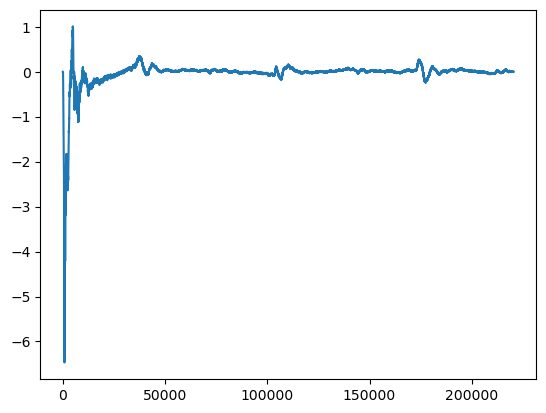

In [89]:
plt.plot(audio)

# Combine Audio & Video

In [90]:
combined_filename = f'output/combination_{datetime.now().strftime("%Y_%m_%d-%H_%M_%S")}.mp4'

# Construct the ffmpeg command to combine video and audio
ffmpeg_command = [
    './ffmpeg',
    '-i', video_filename,   # Input video file
    '-i', audio_filename,   # Input audio file
    '-c:v', 'copy',         # Copy the video stream
    '-c:a', 'aac',          # Encode the audio to AAC (necessary for some formats)
    '-shortest',            # Finish encoding when the shortest input stream ends
    combined_filename         # Output file
]

# Execute the command
subprocess.run(ffmpeg_command)

ffmpeg version 6.1.1-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--stat

CompletedProcess(args=['./ffmpeg', '-i', 'simulation_2024_04_10-13_12_47.mp4', '-i', 'sonification_2024_04_10-16_02_02.wav', '-c:v', 'copy', '-c:a', 'aac', '-shortest', 'combination_2024_04_10-16_02_02.mp4'], returncode=0)